[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-10  149.460007  151.339996  149.220001  151.009995  150.208237   
2023-02-13  150.949997  154.259995  150.919998  153.850006  153.033157   
2023-02-14  152.119995  153.770004  150.860001  153.199997  152.386612   
2023-02-15  153.110001  155.500000  152.880005  155.330002  154.505310   
2023-02-16  153.509995  156.330002  153.350006  153.710007  152.893906   
...                ...         ...         ...         ...         ...   
2024-02-05  188.149994  189.250000  185.839996  187.679993  187.440811   
2024-02-06  186.860001  189.309998  186.770004  189.300003  189.058762   
2024-02-07  190.639999  191.050003  188.610001  189.410004  189.168625   
2024-02-08  189.389999  189.539993  187.350006  188.320007  188.080017   
2024-02-09  188.649994  189.990005  188.000000  188.850006  188.850006   

              Volume  change  instant

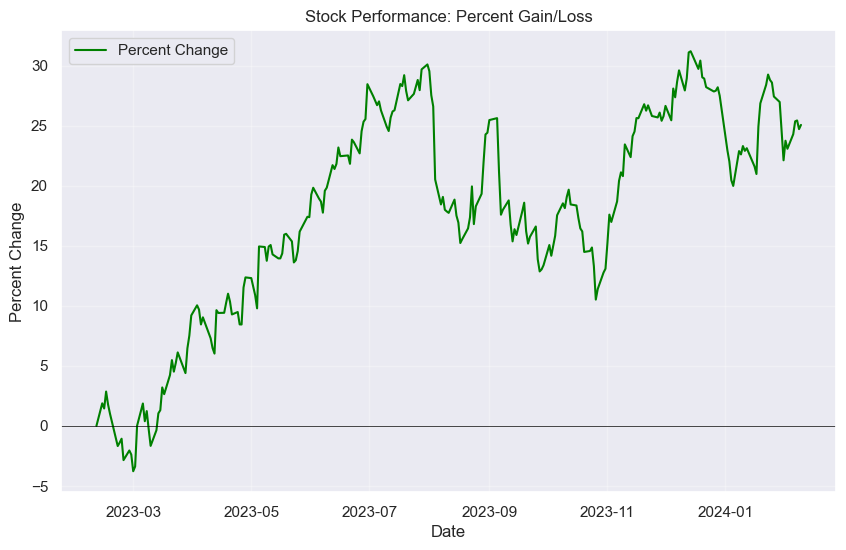

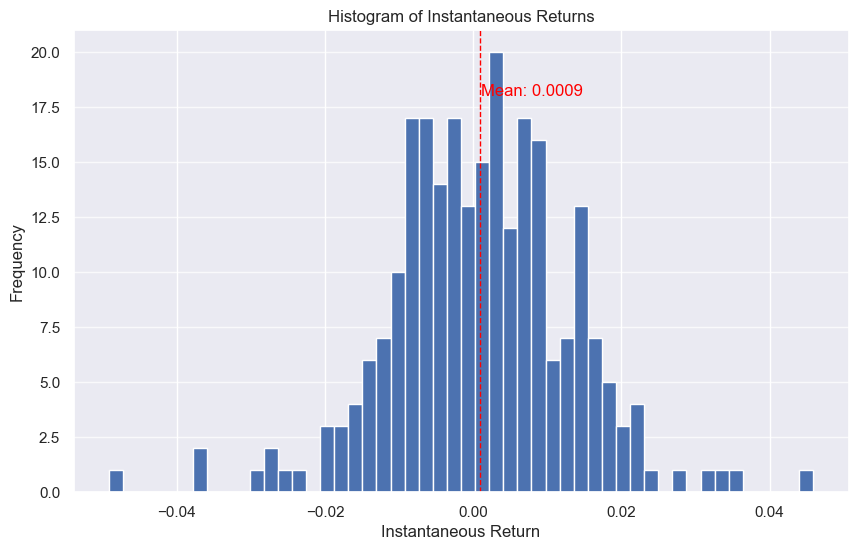

In [12]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # optional may be helpful for plotting percentage
import numpy as np
import pandas as pd
import seaborn as sb # optional to set plot theme
sb.set_theme() # optional to set plot theme
import yfinance as yf

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()


    def get_data(self):
        data = yf.download(self.symbol, start=self.start, end=self.end)
        data.index = pd.to_datetime(data.index)
        self.calc_returns(data)
        self.data = data
        return data
        pass

    
    def calc_returns(self, df):
        
        df['change'] = df['Close'].diff().round(4)
        df['instant_return'] = np.log(df['Close'] / df['Close'].shift(1)).round(4)
        
        pass

    
    def plot_return_dist(self):
        
        valid_returns = self.data['instant_return'].dropna()
        plt.figure(figsize=(10, 6))  
        plt.hist(valid_returns, bins=50, alpha=0.7, color='blue')  
        plt.title('Histogram of Instantaneous Returns')  
        plt.xlabel('Instantaneous Return')  
        plt.ylabel('Frequency')  
        plt.grid(axis='y', alpha=0.75)  
        plt.axvline(valid_returns.mean(), color='red', linestyle='dashed', linewidth=1)  
        plt.text(valid_returns.mean() * 1.1, max(plt.hist(valid_returns, bins=50)[0]) * 0.9, f'Mean: {valid_returns.mean():.4f}', color='red')  
        plt.show()
        pass


    def plot_performance(self):
        
        df = self.data
        initial_close = df['Close'].iloc[0]
        df['percent_change'] = ((df['Close'] - initial_close) / initial_close) * 100
    
        plt.figure(figsize=(10, 6))  
        plt.plot(df.index, df['percent_change'], label='Percent Change', color='green')  
        plt.title('Stock Performance: Percent Gain/Loss')  
        plt.xlabel('Date')  
        plt.ylabel('Percent Change') 
        plt.axhline(0, color='black', linewidth=0.5)  
        plt.grid(axis='both', alpha=0.3)  
        plt.legend() 
        plt.show()
        pass
                  



def main():
    # uncomment (remove pass) code below to test
    test = Stock(symbol='AAPL') # optionally test custom data range
    print(test.data)
    test.plot_performance()
    test.plot_return_dist()
    pass

if __name__ == '__main__':
    main() 